In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [7]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 

df = pd.read_csv('irisdata.csv', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


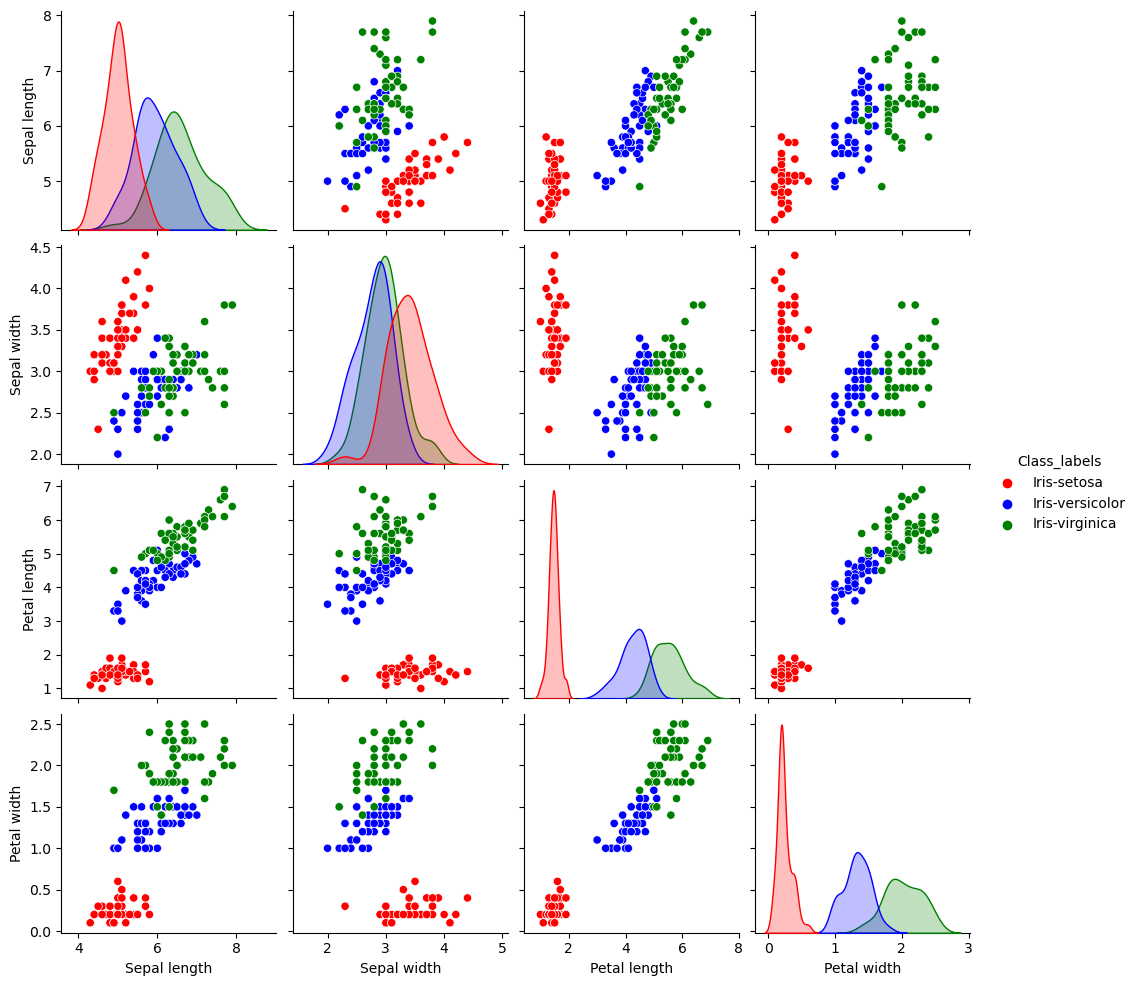

In [10]:
custom_palette = ['red', 'blue', 'green']
sns.pairplot(df, hue='Class_labels', palette=custom_palette)
plt.show()

In [11]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [12]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

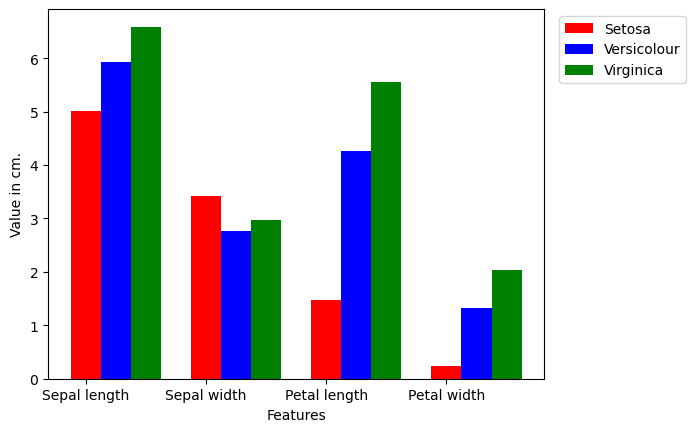

In [14]:
colors = ['red', 'blue', 'green']

plt.bar(X_axis, Y_Data_reshaped[0], width, label='Setosa', color=colors[0])
plt.bar(X_axis + width, Y_Data_reshaped[1], width, label='Versicolour', color=colors[1])
plt.bar(X_axis + width * 2, Y_Data_reshaped[2], width, label='Virginica', color=colors[2])

plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [19]:
predictions = svn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [21]:
X_new = np.array([[6.4,3.2,5.3,2.3], [6.0,3.4,4.5,1.6], [4.8,3.4,1.6,0.2]])
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa']


In [22]:
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)